In [93]:
import numpy as np
import pandas as pd
from fontTools.mtiLib import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/duy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/duy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/duy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/duy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
import sys
print(sys.version)

3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]


In [95]:
!wget -nc "https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv"

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [96]:
df = pd.read_csv('bbc_text_cls.csv')

In [97]:
df.head()

text    labels
0  Ad sales boost Time Warner profit\n\nQuarterly...  business
1  Dollar gains on Greenspan speech\n\nThe dollar...  business
2  Yukos unit buyer faces loan claim\n\nThe owner...  business
3  High fuel prices hit BA's profits\n\nBritish A...  business
4  Pernod takeover talk lifts Domecq\n\nShares in...  business

In [98]:
inputs = df['text']
labels = df['labels']

<Axes: >

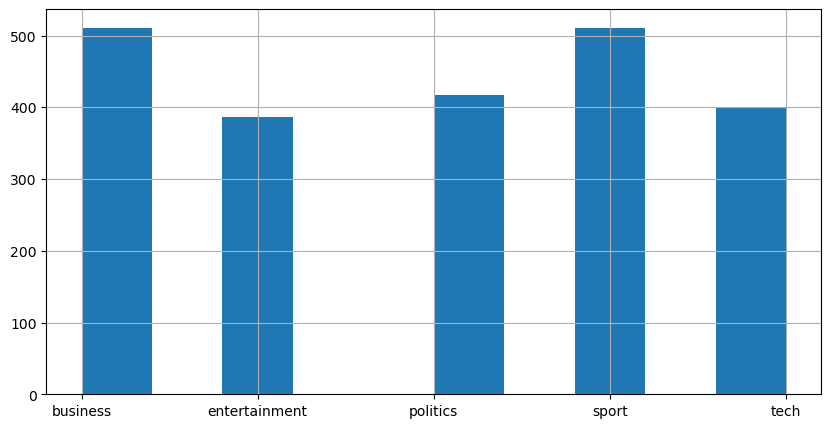

In [99]:
labels.hist(figsize=(10, 5))

In [100]:
print(inputs)

0       Ad sales boost Time Warner profit\n\nQuarterly...
1       Dollar gains on Greenspan speech\n\nThe dollar...
2       Yukos unit buyer faces loan claim\n\nThe owner...
3       High fuel prices hit BA's profits\n\nBritish A...
4       Pernod takeover talk lifts Domecq\n\nShares in...
                              ...                        
2220    BT program to beat dialler scams\n\nBT is intr...
2221    Spam e-mails tempt net shoppers\n\nComputer us...
2222    Be careful how you code\n\nA new European dire...
2223    US cyber security chief resigns\n\nThe man mak...
2224    Losing yourself in online gaming\n\nOnline rol...
Name: text, Length: 2225, dtype: object


In [101]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, random_state=123)

In [102]:
 vectorizer = CountVectorizer()

In [103]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [104]:
X_train

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [105]:
print(X_train != 0)

  (0, 1)	True
  (0, 56)	True
  (0, 477)	True
  (0, 613)	True
  (0, 716)	True
  (0, 1336)	True
  (0, 1378)	True
  (0, 1388)	True
  (0, 1490)	True
  (0, 1492)	True
  (0, 1671)	True
  (0, 1709)	True
  (0, 1746)	True
  (0, 1765)	True
  (0, 1836)	True
  (0, 1899)	True
  (0, 1963)	True
  (0, 2059)	True
  (0, 2090)	True
  (0, 2121)	True
  (0, 2231)	True
  (0, 2303)	True
  (0, 2403)	True
  (0, 2627)	True
  (0, 2946)	True
  :	:
  (1667, 25683)	True
  (1667, 25690)	True
  (1667, 25693)	True
  (1667, 25711)	True
  (1667, 25728)	True
  (1667, 25731)	True
  (1667, 25738)	True
  (1667, 25776)	True
  (1667, 25804)	True
  (1667, 25838)	True
  (1667, 25858)	True
  (1667, 25860)	True
  (1667, 25870)	True
  (1667, 25924)	True
  (1667, 25925)	True
  (1667, 25960)	True
  (1667, 25984)	True
  (1667, 26008)	True
  (1667, 26009)	True
  (1667, 26049)	True
  (1667, 26139)	True
  (1667, 26143)	True
  (1667, 26180)	True
  (1667, 26186)	True
  (1667, 26193)	True


In [106]:
(X_train != 0).sum()

337411

In [107]:
print(X_train.shape)

(1668, 26287)


In [108]:
(X_train != 0).sum() * 100 / np.prod(X_train.shape)

0.7695239935415004

In [109]:
model = MultinomialNB()
model.fit(X_train, y_train)
print("train score: ", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score:  0.9922062350119905
test score:  0.9712746858168761


In [110]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, random_state=123)
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train, y_train)
print("train score: ", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score:  0.9928057553956835
test score:  0.9766606822262118


In [111]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [112]:
#After Lemmatization

In [113]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_tags]

In [114]:
# i = 0
# for sentence in inputs:
#     rs = LemmaTokenizer()(sentence)
#     inputs[i] = rs
#     i+=1

In [115]:
lemma = WordNetLemmatizer()
i = 0
inputs1 = inputs
for sentence in inputs:
    rs = ""
    words_and_tags = nltk.pos_tag(sentence.split())
    for word, tag in words_and_tags:
        rs += lemma.lemmatize(word, get_wordnet_pos(tag)) + " "
        inputs1[i] = rs
    i+=1


In [116]:
X_train, X_test, y_train, y_test = train_test_split(inputs1, labels, random_state=123)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train, y_train)
print("train score: ", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score:  0.9910071942446043
test score:  0.9712746858168761


In [117]:
X_train, X_test, y_train, y_test = train_test_split(inputs1, labels, random_state=123)
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train, y_train)
print("train score: ", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score:  0.9928057553956835
test score:  0.9712746858168761


In [118]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, random_state=123)
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train, y_train)
print("train score: ", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

/home/duy/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score:  0.9922062350119905
test score:  0.9676840215439856


In [119]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, random_state=123)
vectorizer = CountVectorizer(tokenizer = LemmaTokenizer(), stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train, y_train)
print("train score: ", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

/home/duy/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/duy/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  warnings.warn(


train score:  0.9934052757793765
test score:  0.9694793536804309


In [120]:
def simple_tokenizer(s):
    return s.split()

In [122]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, random_state=123)
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train, y_train)
print("train score: ", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

/home/duy/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score:  0.9952038369304557
test score:  0.9658886894075404
